In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# Load raw data
raw_communities = pd.read_csv('../Data/communities.csv')
raw_egm = pd.read_csv('../Data/EGM.csv')
raw_houses = pd.read_csv('../Data/Houses-by-suburb.csv')
raw_offences = pd.read_excel("../Data/LGA_Offences.xlsx", sheet_name=None)

In [4]:
# Process data
def check_column_types(df):
    """
    Check if all rows in each column have the same type

    Args:
      df: DataFrame

    Returns:
      True if all columns have the same type, False otherwise
    """
    for key in df.keys():
        column = df[key]
        if not column.apply(type).nunique() == 1:
            print(key, column.apply(type).unique())
            return False
    return True

offences = pd.DataFrame(raw_offences['Table 01']).dropna()
# rate = offences['Rate per 100,000 population']
# offence_count = offences['Offence Count']
# lga = offences['Local Government Area']
# police_region = offences['Police Region']
# year_ending = offences['Year ending']
# year = offences['Year']

communities = raw_communities.dropna()
egm = raw_egm.dropna()
houses = raw_houses.dropna()

# Check types
check_column_types(communities) # Output: Top country of birth [<class 'str'> <class 'float'>]
check_column_types(egm)
check_column_types(houses)
check_column_types(offences)

True

In [5]:
# Check for missing values
import json, re

with open('../localityToLGA.json') as f:
    localityToLGA = json.load(f)

# Check LGA values
houses['LGA'] = houses['Locality'] \
  .apply(str.lower) \
  .apply(lambda x: ''.join(x.split(' '))) \
  .apply(lambda x: re.sub(r'\s*(NORTH|SOUTH|EAST|WEST)\s*', '', x, flags=re.IGNORECASE)) \
  .map(localityToLGA)

na_rows = houses.loc[houses['LGA'].isna()]
# print(len(na_rows))
# print(na_rows.head())

# Drop rows with missing LGA
# This should be handmapped later using dictionary Khang specified in the README
houses = houses.dropna(subset=['LGA'])

# Clean communities LGA values
communities['LGA'] = communities['LGA'] \
    .apply(str.lower) \
    .apply(lambda x: ''.join(x.split(' '))) \
    .apply(lambda x: re.sub(r'\(.*?\)', '', x, flags=re.IGNORECASE))


# Clean egm LGA values
egm['LGA'] = egm['LGA Name'] \
    .apply(str.lower) \
    .apply(lambda x: x.split('of')[-1]) \
    .apply(lambda x: x.replace(' ', '')) \

# Clean offences LGA values
offences['LGA'] = offences['Local Government Area'] \
    .apply(str.lower) \
    .apply(lambda x: ''.join(x.split(' '))) \

# Get LGA values which are not common across all datasets
lga_union = set(communities['LGA']) | set(houses['LGA']) | set(egm['LGA']) | set(offences['LGA'])
lga_intersect = set(communities['LGA']) & set(houses['LGA']) & set(egm['LGA']) & set(offences['LGA'])
lga_diff = lga_union - lga_intersect

print(f'LGA values which are not common across all datasets: {len(lga_diff)}')
print(lga_diff)

LGA values which are not common across all datasets: 32
{'total', 'corangamite', 'buloke', 'alpine', 'moreland', 'westwimmera', 'merri-bek', 'nillumbik', 'warrnambool', 'queenscliffe', 'pyrenees', 'gannawarra', 'ararat', 'hindmarsh', 'towong', 'loddon', 'mountalexander', 'hepburn', 'mansfield', 'yarriambiack', 'murrindindi', 'moyne', 'colac-otway', 'glenelg', 'indigo', 'colacotway', 'merribek', 'moira', 'goldenplains', 'strathbogie', 'centralgoldfields', 'southerngrampians'}


/var/folders/19/534nl8853rg0sycn60dtsltr0000gn/T/ipykernel_6070/405003634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['LGA'] = houses['Locality'] \
/var/folders/19/534nl8853rg0sycn60dtsltr0000gn/T/ipykernel_6070/405003634.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  communities['LGA'] = communities['LGA'] \
/var/folders/19/534nl8853rg0sycn60dtsltr0000gn/T/ipykernel_6070/405003634.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [6]:
# Display datasets

print(communities.head())
print(egm.head())
print(houses.head())
print(offences.head())

          Community Name                             Region  Map reference  \
0    Abbotsford (Suburb)  Northern and Western Metropolitan              4   
1    Aberfeldie (Suburb)  Northern and Western Metropolitan              4   
5  Airport West (Suburb)  Northern and Western Metropolitan              4   
6     Albanvale (Suburb)  Northern and Western Metropolitan              3   
7   Albert Park (Suburb)              Southern Metropolitan              1   

  Grid reference               Location  Population Density  \
0             C3   3km ENE of Melbourne         3082.440714   
1             B2    8km NW of Melbourne         2426.665450   
5             A1   12km NW of Melbourne         1972.445069   
6             D1  19km WNW of Melbourne         2879.831482   
7             B1     3km S of Melbourne         1850.280150   

   Travel time to GPO (minutes)  Distance to GPO (km)           LGA  \
0                      6.114670              4.264157         yarra   
1         

In [7]:
# Join on LGA
# For now exclude rows where the LGA values which are not common across all datasets

# communities_house_merged = pd.merge(communities, houses, on='LGA', how='inner')
communities_egm_merged = pd.merge(communities, egm, on='LGA', how='inner')
communities_egm_merged
# communities_offences_merged = pd.merge(communities, offences, on='LGA', how='inner')

# houses_egm_merged = pd.merge(houses, egm, on='LGA', how='inner')
# houses_offences_merged = pd.merge(houses, offences, on='LGA', how='inner')

# egm_offences_merged = pd.merge(egm, offences, on=['LGA'], how='inner')
# offences

Text(0.5, 1.0, 'Offence rate by LGA')

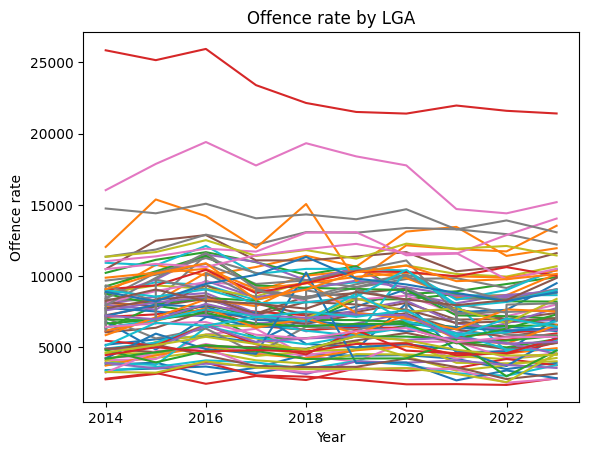

In [8]:
# Offence rate per population

grouped = offences.groupby(['LGA'])

for name, group in grouped:
    plt.plot(group['Year'], group['Rate per 100,000 population'], label=name)

plt.xlabel('Year')
plt.ylabel('Offence rate')
plt.title('Offence rate by LGA')

Text(0.5, 1.0, 'Median offence rate over all LGA')

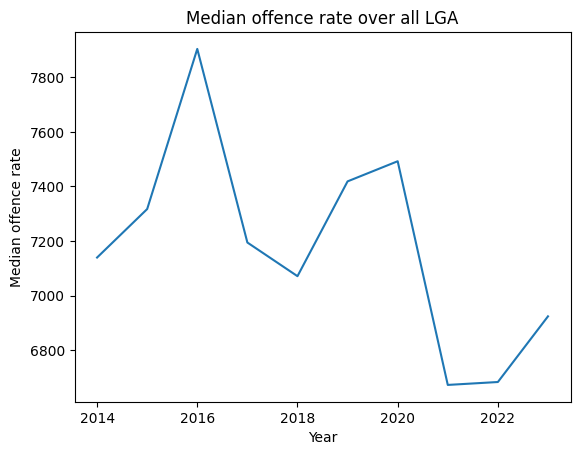

In [9]:
# Median offence rate per population over all LGA

grouped = offences.groupby('Year')

data = {}
for name, group in grouped:
  data[name] = group['Rate per 100,000 population'].median()

# The graphs suggests a decrease in crime rates from 2014 to 2023
plt.plot(data.keys(), data.values())

plt.xlabel('Year')
plt.ylabel('Median offence rate')
plt.title('Median offence rate over all LGA')

Text(0.5, 1.0, 'Loss per person for each LGA')

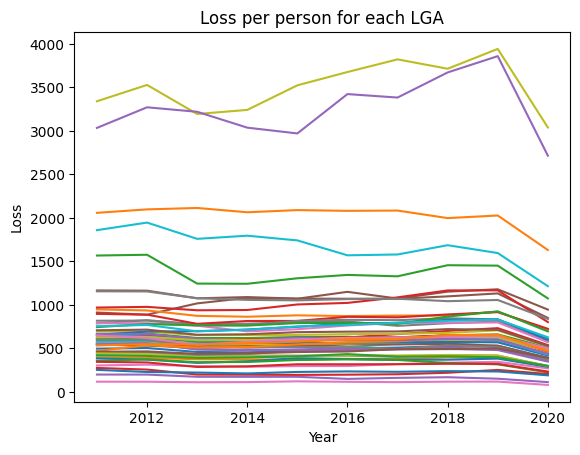

In [10]:
# Investigate EGM trend grouped by LGA

# Get populations for each LGA
populations = {}
df = communities.groupby('LGA')
for (name, group) in df:
    if name not in populations:
        populations[name] = 0
    populations[name] += (group['Population Density'] * group['Area (km^2)']).sum()

# Copy EGM data
new_egm = egm.copy()

# Calculate loss per person
# Assume that the population is the same over the years
new_egm['population'] = new_egm['LGA'].map(populations)
for year in range(2011, 2020 + 1):
    new_egm[str(year)] = new_egm[str(year)] / (new_egm['population'])

# Discard rows with missing population value
new_egm = new_egm.dropna()

data = {
    'LGA': [],
    'year': [],
    'loss': [],
}

for index, row in new_egm.iterrows():
    for year in range(2011, 2020 + 1):
        lga = row['LGA']
        data['LGA'].append(lga)
        data['year'].append(year)
        data['loss'].append(row[str(year)])

df = pd.DataFrame(data)

for name, group in df.groupby('LGA'):
    plt.plot(group['year'], group['loss'], label=name)

plt.xlabel('Year')
plt.ylabel('Loss')
plt.title('Loss per person for each LGA')


Text(0.5, 1.0, 'Median loss per person across all LGA')

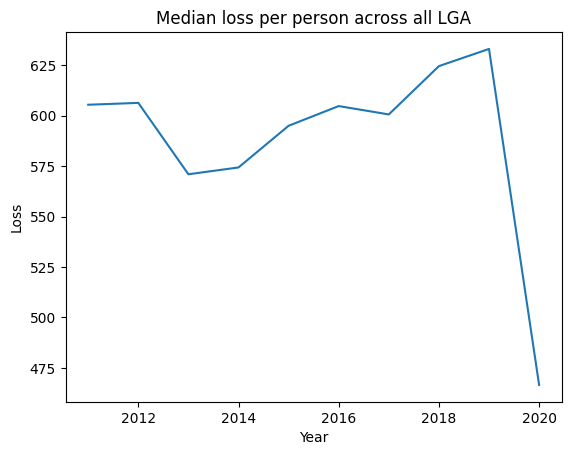

In [11]:
# Median EGM loss per person across all LGA

egm_median_data = {}
for name, group in df.groupby('year'):
  egm_median_data[name] = group['loss'].median()

plt.plot(egm_median_data.keys(), egm_median_data.values())

plt.xlabel('Year')
plt.ylabel('Loss')
plt.title('Median loss per person across all LGA')

Text(0, 0.5, 'Loss per person')

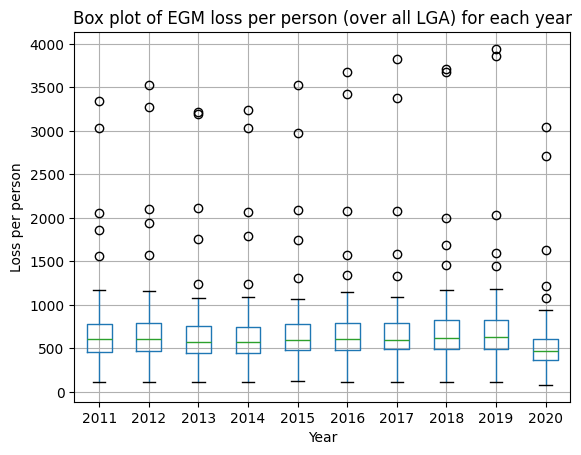

In [12]:
# Some box plots

new_egm.boxplot(column=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
plt.title('Box plot of EGM loss per person (over all LGA) for each year')
plt.xlabel('Year')
plt.ylabel('Loss per person')

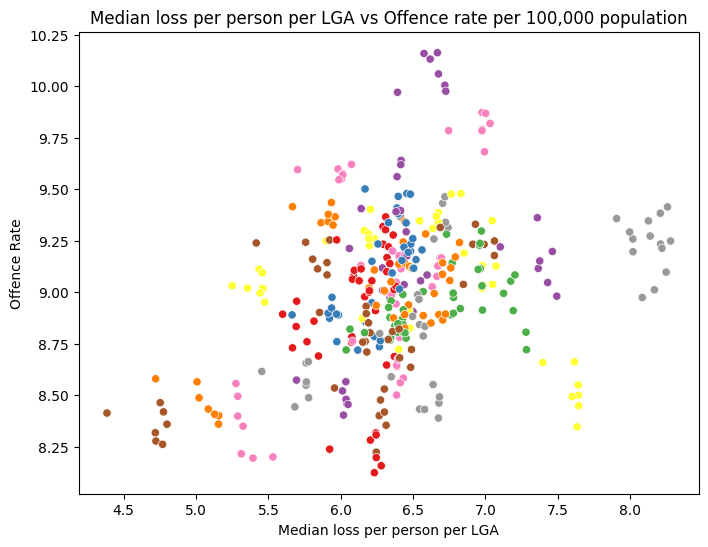

In [13]:
# Plot EGM loss per person against offence rate
egm_offence_data = {
    'LGA': [],
    'loss': [],
    'offence_rate': [],
}

for name, group in new_egm.groupby('LGA'):
    for year in range(2014, 2020 + 1):
        egm_offence_data['LGA'].append(name)

        # Apply log to both axes to reduce effects of outliers?
        egm_offence_data['loss'].append(group[str(year)].apply(math.log).median())
        egm_offence_data['offence_rate'].append(
            offences.loc[(offences['Year'] == year) & (offences['LGA'] == name), 'Rate per 100,000 population'].apply(math.log).median()
            # offences.loc[(offences['Year'] == year) & (offences['LGA'] == name), 'Offence Count'].apply(math.log).median()
        )

# Create scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loss', y='offence_rate', hue='LGA', palette='Set1', data=egm_offence_data, legend=False)

# Add labels and title
plt.xlabel('Median loss per person per LGA')
plt.ylabel('Offence Rate')
plt.title('Median loss per person per LGA vs Offence rate per 100,000 population')

# Show the plot
plt.show()

In [14]:
# Correlation between median EGM loss per person and offence rate per 100,000 population, for each LGA
egm_offence_df = pd.DataFrame(egm_offence_data)
for name, group in egm_offence_df.groupby('LGA'):
    correlation = group['loss'].corr(group['offence_rate'])
    print(correlation)

0.7852435105059428
0.18306189809392498
-0.38733237426896494
-0.01614971457492804
-0.8552842584268218
0.012476950896407926
-0.24931977574053937
-0.36077084043345276
0.3543204501867435
-0.5316111699595389
0.1603870677444093
-0.19452846126367385
-0.049550941743907284
-0.28801211501624263
0.24196571976980094
-0.36641520270756267
0.006772791556699815
0.045688021244688126
-0.025454120441163113
-0.058305754834313314
0.5293820800292284
0.015954401469193157
0.220259724054621
-0.05543520881540132
-0.35661079990692124
0.1168655116100975
-0.5560559382425289
-0.09878861416264667
-0.32680747748184613
0.42342124324713293
0.10331795392284787
-0.5464630872017089
0.842607526466906
-0.11501201443194345
-0.496292434665513
0.27528130590377803
-0.4635098280446456
nan
0.12305163171033293
-0.45494260140776266
-0.3795970189946352
-0.5705497971917499
-0.4567950947787064
-0.6993967185309171
0.4963129154018653
-0.9287085614129271
0.33683501714205566
-0.4212540688875289
-0.5651996524765542
0.0193102389260643
-0.04

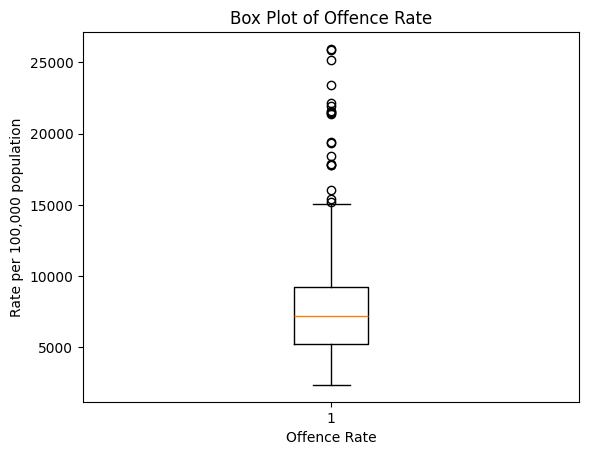

In [15]:
import matplotlib.pyplot as plt

plt.boxplot(offences['Rate per 100,000 population'])
plt.xlabel('Offence Rate')
plt.ylabel('Rate per 100,000 population')
plt.title('Box Plot of Offence Rate')
plt.show()

In [16]:
column = offences['Rate per 100,000 population']

Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
offences_cleaned = offences[~((column < lower_bound) | (column > upper_bound))]

# print("Outliers:")
print(offences_cleaned)

     Year Year ending       Police Region Local Government Area  \
0    2023    December  1 North West Metro               Banyule   
1    2023    December  1 North West Metro              Brimbank   
2    2023    December  1 North West Metro               Darebin   
3    2023    December  1 North West Metro           Hobsons Bay   
4    2023    December  1 North West Metro                  Hume   
..    ...         ...                 ...                   ...   
861  2014    December           4 Western             Swan Hill   
862  2014    December           4 Western           Warrnambool   
863  2014    December           4 Western          West Wimmera   
864  2014    December           4 Western          Yarriambiack   
865  2014    December           4 Western                 Total   

     Offence Count  Rate per 100,000 population           LGA  
0             8072                  6256.318199       banyule  
1            17044                  8666.589574      brimbank  
2  

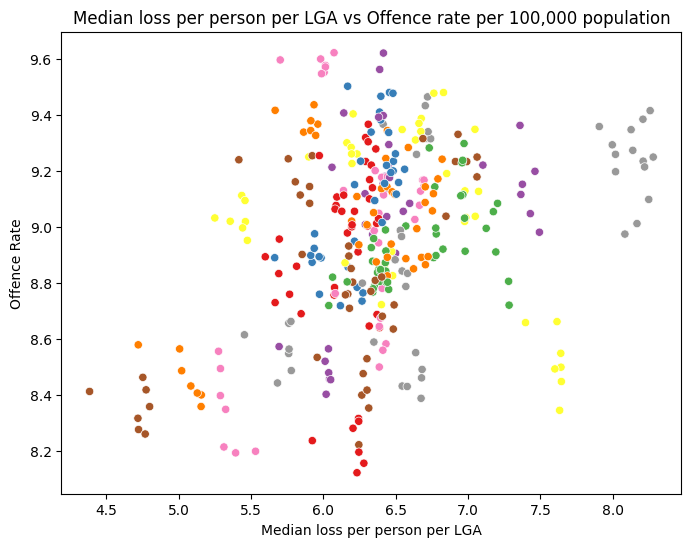

In [17]:
# Plot EGM loss per person against offence rate
egm_offence_data = {
    'LGA': [],
    'loss': [],
    'offence_rate': [],
}

for name, group in new_egm.groupby('LGA'):
    for year in range(2014, 2020 + 1):
        egm_offence_data['LGA'].append(name)

        # Apply log to both axes to reduce effects of outliers?
        egm_offence_data['loss'].append(group[str(year)].apply(math.log).median())
        egm_offence_data['offence_rate'].append(
            offences_cleaned.loc[(offences_cleaned['Year'] == year) & (offences_cleaned['LGA'] == name), 'Rate per 100,000 population'].apply(math.log).median()
            # offences.loc[(offences['Year'] == year) & (offences['LGA'] == name), 'Offence Count'].apply(math.log).median()
        )

# Create scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loss', y='offence_rate', hue='LGA', palette='Set1', data=egm_offence_data, legend=False)

# Add labels and title
plt.xlabel('Median loss per person per LGA')
plt.ylabel('Offence Rate')
plt.title('Median loss per person per LGA vs Offence rate per 100,000 population')

# Show the plot
plt.show()

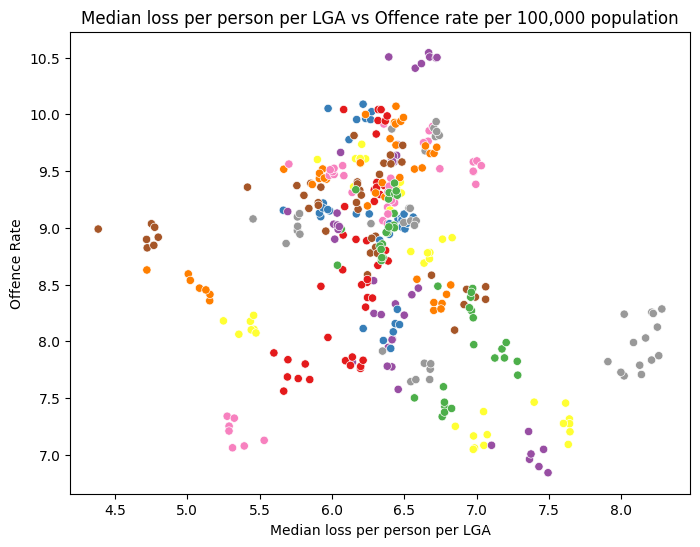

In [18]:
# Try offence count instead of rate
# Plot EGM loss per person against offence rate
egm_offence_data = {
    'LGA': [],
    'loss': [],
    'offence_count': [],
}

for name, group in new_egm.groupby('LGA'):
    for year in range(2014, 2020 + 1):
        egm_offence_data['LGA'].append(name)

        # Apply log to both axes to reduce effects of outliers?
        egm_offence_data['loss'].append(group[str(year)].apply(math.log).median())
        egm_offence_data['offence_count'].append(
            offences.loc[(offences['Year'] == year) & (offences['LGA'] == name), 'Offence Count'].apply(math.log).median()
            # offences.loc[(offences['Year'] == year) & (offences['LGA'] == name), 'Offence Count'].apply(math.log).median()
        )

# Create scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loss', y='offence_count', hue='LGA', palette='Set1', data=egm_offence_data, legend=False)

# Add labels and title
plt.xlabel('Median loss per person per LGA')
plt.ylabel('Offence Rate')
plt.title('Median loss per person per LGA vs Offence rate per 100,000 population')

# Show the plot
plt.show()